In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [34]:
data = pd.read_csv("./dataset/recipes_entrenamiento.csv")

In [3]:
X = data.iloc[:,6:15]

def dividir_entre_personas(row):
    return row / data["RecipeServings"][row.name]

X = X.apply(dividir_entre_personas, axis=1)

In [4]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

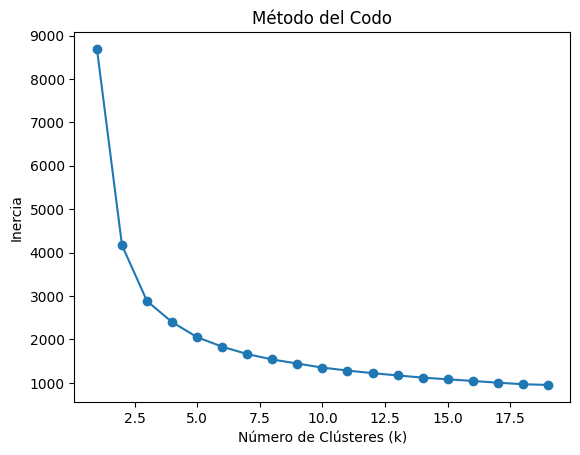

In [5]:
# Lista para almacenar las inercias
inercias = []

# Probar diferentes valores de k
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercias.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 20), inercias, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [36]:
model = KMeans(n_clusters=8, random_state=44)

data["cluster"] = model.fit_predict(X_scaled)

In [7]:
reductor = NMF(n_components=2, random_state=44)
x_reduced = reductor.fit_transform(X_scaled)

In [8]:
data["cluster"].unique()

array([0, 6, 3, 4, 5, 2, 1, 7])

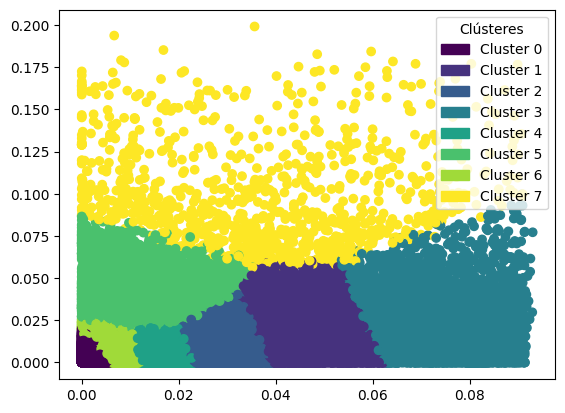

In [32]:
import matplotlib.patches as mpatches
import numpy as np

# Supongamos que "data['cluster']" tiene valores como 0, 1, 2, etc.
clusters = sorted(set(data["cluster"]))  # Obtener los clústeres únicos)
colors = plt.cm.viridis(np.array(clusters) / max(clusters))       # Generar colores del mapa de colores 'viridis'

# Crear el gráfico de dispersión
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=data["cluster"], cmap="viridis")

# Crear etiquetas para la leyenda
leyenda = [mpatches.Patch(color=colors[i], label=f"Cluster {i}") for i in clusters]

# Agregar la leyenda al gráfico
plt.legend(handles=leyenda, title="Clústeres")
plt.show()

In [10]:
data["cluster"].value_counts()

cluster
0    152469
6     78704
4     44572
2     21616
1      9887
5      7495
3      4222
7      1007
Name: count, dtype: int64

In [11]:
model.inertia_

1537.6225143016172

In [ ]:
# Calcular el Silhouette Score
score = silhouette_score(X_scaled, data["cluster"])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.4011364110354706


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data["cluster"], test_size=0.2, random_state=44)

In [14]:
model_pred = LogisticRegression()
model_pred.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model_pred.predict(X_test)

In [16]:
print(f"acuraccy: {accuracy_score(y_test, y_pred)}")
print(f"recall: {precision_score(y_test, y_pred, average=None)}")
print(f"presition: {recall_score(y_test, y_pred, average=None)}")

acuraccy: 0.9690757090397687
recall: [0.98258931 0.93472298 0.93799002 0.98495212 0.95131254 0.96373457
 0.96675708 0.8056872 ]
presition: [1.         0.86850153 0.90633609 0.86227545 0.95463244 0.85665295
 0.96578234 0.79812207]


In [38]:
data[ (data["cluster"] == 0) & (data["RecipeServings"] == 1)].iloc[:,6:15].mean()

Calories               103.559755
FatContent               0.647503
SaturatedFatContent      0.270701
CholesterolContent       0.990010
SodiumContent            6.120332
CarbohydrateContent     10.188602
FiberContent             0.696648
SugarContent             7.083842
ProteinContent           0.558448
dtype: float64

In [39]:
data[ (data["cluster"] == 1) & (data["RecipeServings"] == 1)].iloc[:,6:15].mean()

Calories               320.016124
FatContent              14.810412
SaturatedFatContent      5.514534
CholesterolContent      91.312726
SodiumContent          502.328127
CarbohydrateContent     32.078091
FiberContent             3.717787
SugarContent             9.456833
ProteinContent          15.710340
dtype: float64

In [40]:
data[ (data["cluster"] == 2) & (data["RecipeServings"] == 1)].iloc[:,6:15].mean()

Calories               220.049584
FatContent               7.932744
SaturatedFatContent      2.790956
CholesterolContent      44.525468
SodiumContent          309.302807
CarbohydrateContent     27.196258
FiberContent             2.959044
SugarContent             9.881705
ProteinContent          10.589813
dtype: float64

In [41]:
data[ (data["cluster"] == 3) & (data["RecipeServings"] == 1)].iloc[:,6:15].mean()

Calories               430.721453
FatContent              22.159170
SaturatedFatContent      8.738754
CholesterolContent     128.975952
SodiumContent          795.765484
CarbohydrateContent     37.062716
FiberContent             4.125346
SugarContent             8.426384
ProteinContent          21.510986
dtype: float64

In [42]:
data[ (data["cluster"] == 4) & (data["RecipeServings"] == 1)].iloc[:,6:15].mean()

Calories               153.694743
FatContent               4.541051
SaturatedFatContent      1.921253
CholesterolContent      19.045302
SodiumContent          168.004698
CarbohydrateContent     21.118233
FiberContent             2.138591
SugarContent             9.418680
ProteinContent           7.470470
dtype: float64

In [43]:
data[ (data["cluster"] == 5) & (data["RecipeServings"] == 1)].iloc[:,6:15].mean()

Calories               433.913823
FatContent              16.038083
SaturatedFatContent      6.436587
CholesterolContent      68.120734
SodiumContent          122.027431
CarbohydrateContent     54.475810
FiberContent             4.935020
SugarContent            31.372141
ProteinContent          11.225579
dtype: float64

In [44]:
data[ (data["cluster"] == 6) & (data["RecipeServings"] == 1)].iloc[:,6:15].mean()

Calories               185.478678
FatContent               4.405794
SaturatedFatContent      2.118923
CholesterolContent      15.836668
SodiumContent           53.204255
CarbohydrateContent     23.409235
FiberContent             2.038751
SugarContent            14.476234
ProteinContent           3.914531
dtype: float64

In [45]:
data[ (data["cluster"] == 7) & (data["RecipeServings"] == 1)].iloc[:,6:15].mean()

Calories               1171.165891
FatContent               56.503411
SaturatedFatContent      24.180155
CholesterolContent      178.027597
SodiumContent           397.041705
CarbohydrateContent     140.348527
FiberContent              8.883566
SugarContent             86.100620
ProteinContent           27.176744
dtype: float64

In [21]:
data = data[ ["RecipeId", "cluster"] ]
data.to_csv('./dataset/recipes_entrenamiento_clusterizada.csv', index=False)

In [20]:
from joblib import dump
dump(model_pred, './models/model.joblib')

['./models/model.joblib']